In [1]:
import pandas as pd
import numpy as np
import os
import csv
import gzip
import sys
import datetime
import ast
import matplotlib.pyplot as plt
import scipy.stats as SSA
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
df_scores = pd.read_csv('../results/scores/survey_scores_perinfo.csv')

In [3]:
vmax_min_dic = {
    'regulated_tdscores_mode': (58, 70), 
    'regulated_loss_mode': (50, 71), 
    'regulated_agency_mode': (55, 80)
}

In [9]:
df_scores

,ResponseId,zipcode,alloc_debt,alloc_spend,alloc_save,alloc_invest,Age,Risk_preference,score,presbias,...,alloc_invest_scaled,age_num_scaled,expectation_num_scaled,financial_2020_num_scaled,financial_now_num_scaled,financial_change_num_scaled,credit_debt_num_scaled,education_num_scaled,employment_num_scaled,financials_scaled
0,R_02o2D09NfVJOHD3,11375 Ridgewood - Forest Hills (Queens),0,300,500,200,51,0,10,0,...,20.0,44.776119,50.0,100.0,100.0,50.0,100.0,66.666667,83.333333,85.714286
1,R_03dOZigqC0YU0kF,10473 Pelham - Throgs Neck (Bronx),300,0,200,500,49,0,10,0,...,50.0,41.791045,50.0,40.0,60.0,0.0,40.0,50.000000,100.000000,35.714286
2,R_0cy5qgo5k6XgQ7f,11694 Rockaways (Queens),0,500,250,250,37,0,6,1,...,25.0,23.880597,100.0,80.0,80.0,50.0,100.0,50.000000,100.000000,71.428571
3,R_0dLmGExTPQ2mAEh,10003 Union Square - Lower East Side (Manhattan),300,500,200,0,34,3,11,0,...,0.0,19.402985,25.0,20.0,0.0,50.0,60.0,50.000000,66.666667,21.428571
4,R_0fDoGV7JgZ3uktb,10453 Crotona -Tremont (Bronx),800,20,110,70,27,0,16,0,...,7.0,8.955224,75.0,60.0,60.0,25.0,60.0,66.666667,66.666667,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,R_Zk33tWUYV0Z9QwF,11234 Canarsie - Flatlands (Brooklyn),1000,0,0,0,42,1,11,0,...,0.0,31.343284,100.0,40.0,40.0,25.0,0.0,50.000000,0.000000,35.714286
1340,R_ZK4lpmwZHVoxBdL,10456 High Bridge - Morrisania (Bronx),500,0,300,200,23,3,11,0,...,20.0,2.985075,0.0,0.0,0.0,0.0,20.0,66.666667,66.666667,0.000000
1341,R_ZKMH6oWG5Qj5qSZ,11206 Williamsburg - Bushwick (Brooklyn),400,300,200,100,27,2,10,0,...,10.0,8.955224,100.0,100.0,100.0,100.0,100.0,66.666667,66.666667,100.000000
1342,R_Zq7YBAzFUn3l6Cd,11412 Jamaica (Queens),500,250,150,100,21,0,13,0,...,10.0,0.000000,0.0,60.0,0.0,75.0,100.0,50.000000,66.666667,42.857143


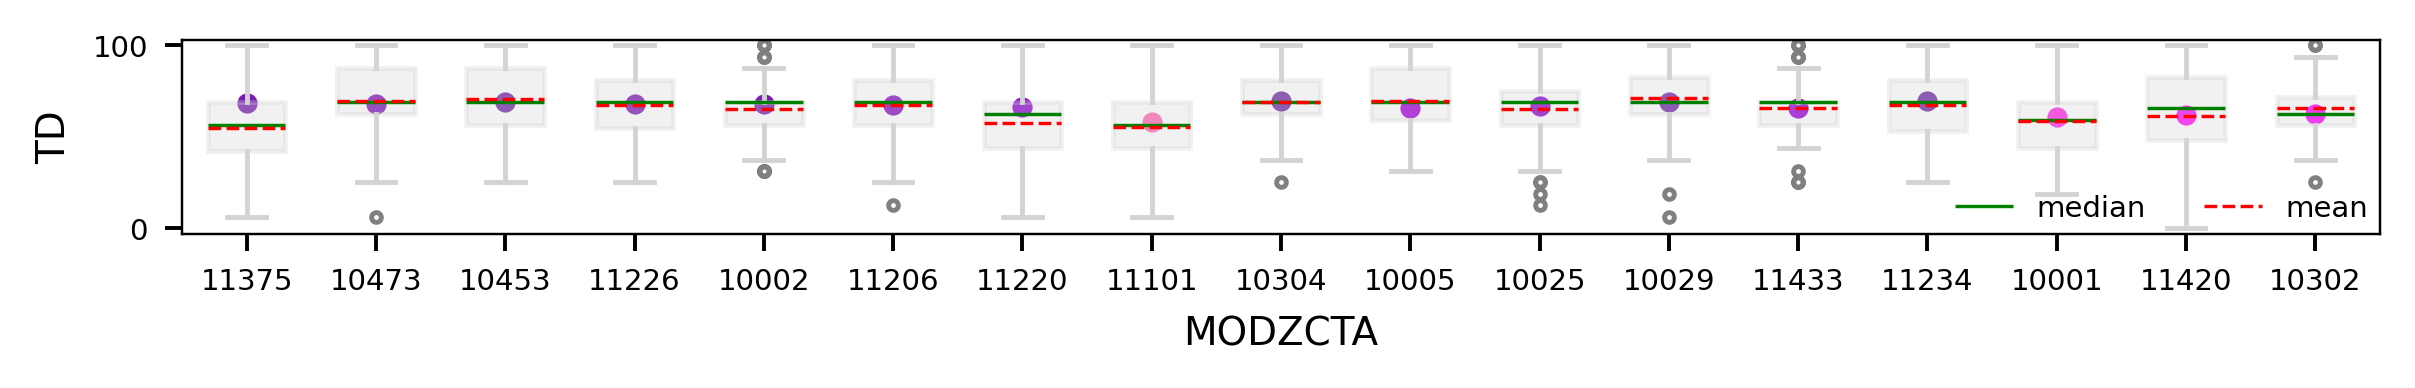

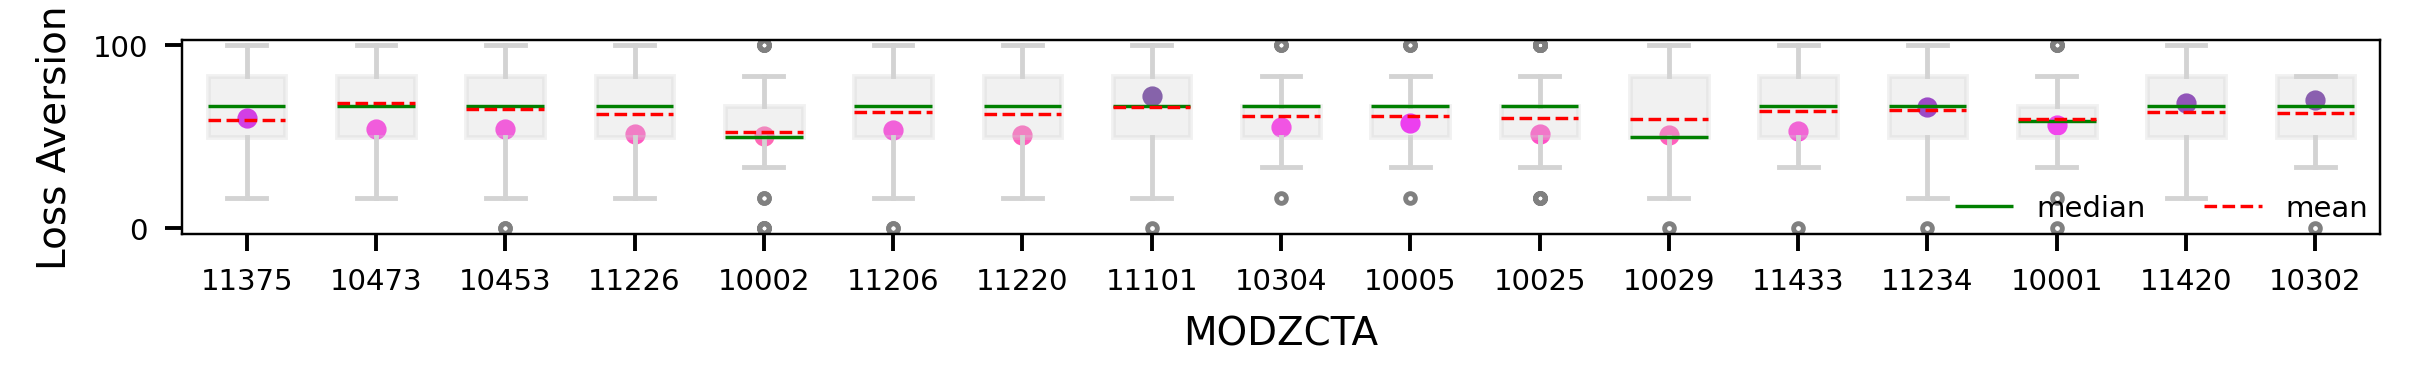

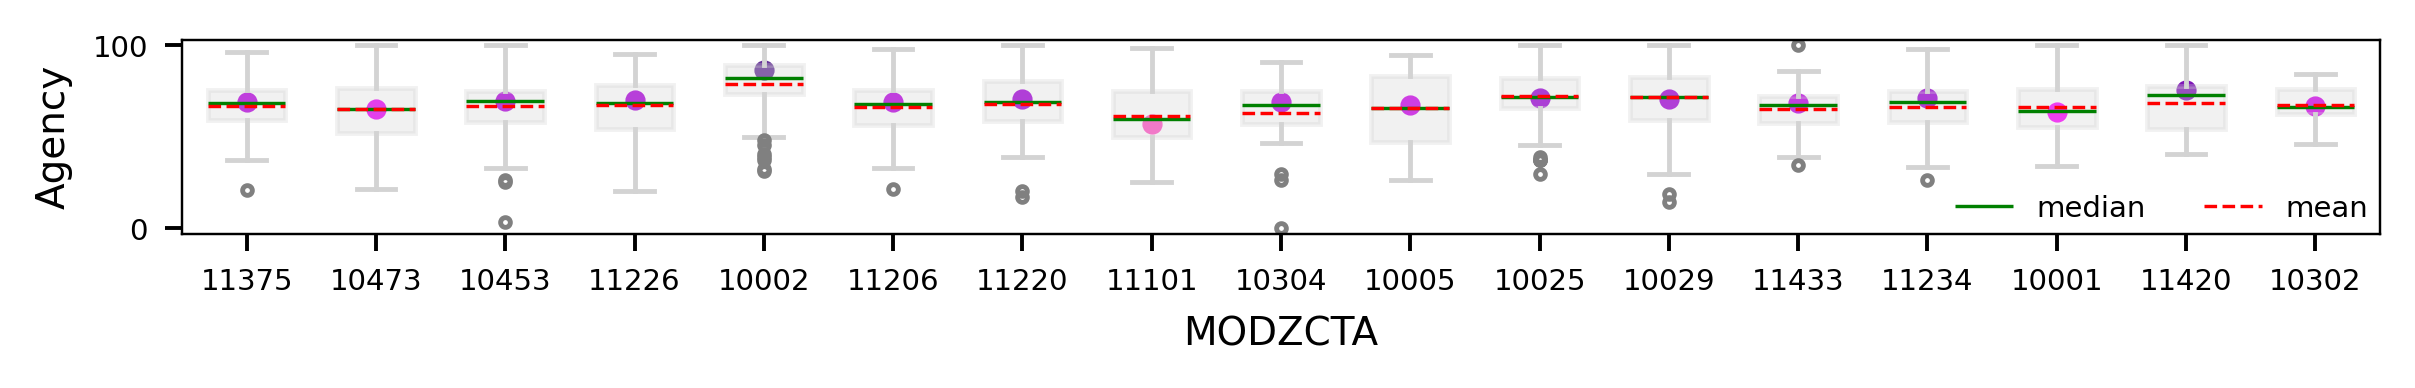

In [5]:
for score_name in ['regulated_tdscores','regulated_loss','regulated_agency']:
    # score_name  = 'regulated_tdscores'
    df_i = df_scores[df_scores['modzcta_count']>15][[score_name,'MODZCTA']]
    # grouped = df_i.groupby('MODZCTA')
    vmin, vmax = vmax_min_dic[score_name+'_mode']
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    # cmap = cm.winter  # Use the 'winter' colormap
    pink_to_purple = mcolors.LinearSegmentedColormap.from_list(
    "PinkToPurple", ["hotpink", "magenta", "darkviolet","rebeccapurple"])


    plt.figure(figsize=(7, 1.2),dpi=350)
    for i, group in enumerate(df_i['MODZCTA'].unique()):
        # Extract the group data
        group_data = df_i[df_i['MODZCTA'] == group][score_name]
        # Calculate median
        # Calculate mode (mode can have multiple values, we'll take the first mode)
        # mode_val = SSA.mode(group_data)[0]
        # Create the violin shape
        # color_fill = {'regulated_tdscores': 'grey', 'regulated_loss': 'yellowgreen', 'regulated_agency': 'skyblue'}[score_name]
        color_fill = {'regulated_tdscores': 'lightgrey', 'regulated_loss': 'lightgrey', 'regulated_agency': 'lightgrey'}[score_name]
        # plt.fill_betweenx(x_vals, i, i + kde_vals, color=color_fill, alpha=0.4)
        plt.boxplot(group_data, positions=[i], widths=0.6, patch_artist=True, 
                    boxprops=dict(facecolor=color_fill, color='lightgrey',alpha = 0.3), 
                    whiskerprops=dict(color='lightgrey'), capprops=dict(color='lightgrey'), 
                    flierprops=dict(marker='o', markerfacecolor='none', markersize=2, linestyle='none', markeredgecolor='grey'),medianprops=dict(color='none'))
        
        # plt.boxplot(group_data, positions=[i], widths=0.6, patch_artist=True,
        median_val = np.median(group_data)
        plt.hlines(median_val, i-0.3, i+0.3, color="green", linestyle='-', linewidth=0.7,label='median' if i == 0 else "")
        ### add mean value 
        mean_value = np.mean(group_data)
        plt.hlines(mean_value, i-0.3, i+0.3, color="red", linestyle='--', linewidth=0.7,label='mean' if i == 0 else "")
    for i, group in enumerate(df_i['MODZCTA'].unique()):
        group_data = df_i[df_i['MODZCTA'] == group][score_name]
        # Calculate media
        # Find the maximum of the KDE
        kde = gaussian_kde(group_data)
        x_vals = np.linspace(min(group_data), max(group_data), 1000)  # Create a range of values for KDE
        kde_vals = kde(x_vals)
        max_kde_val = x_vals[np.argmax(kde_vals)]
        # kde_vals = kde_vals / kde_vals.max() * 0.6  # Scale to control width of the violin
        color = pink_to_purple(norm(max_kde_val))
        plt.scatter(i, max_kde_val, color=color, s=10, alpha = 1)
        
    # plt.axhline(y=50, color='grey', linewidth=0.5)
    # Add legend without frame
    
    plt.ylim(-3,103)
    # Set axis properties
    plt.xticks(range(len(df_i['MODZCTA'].unique())), df_i['MODZCTA'].unique(), fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel('MODZCTA',fontsize=8)
    y_name = {'regulated_tdscores':'TD','regulated_loss':'Loss Aversion','regulated_agency':'Agency'}[score_name]
    plt.ylabel(y_name,fontsize=8)
    # Set frame linewidth
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    title_name = {'regulated_tdscores':'a','regulated_loss':'b','regulated_agency':'c'}[score_name]
    plt.legend(frameon=False, fontsize=6, loc='lower right',ncol=2,borderaxespad=0)
    # plt.title(title_name, fontsize=12,loc='left',fontweight='bold')
    plt.tight_layout()
    # plt.savefig('../results/plots_maps/box_per_zcta_{}.png'.format(score_name),dpi=350, bbox_inches='tight',transparent=True)
    # plt.show()

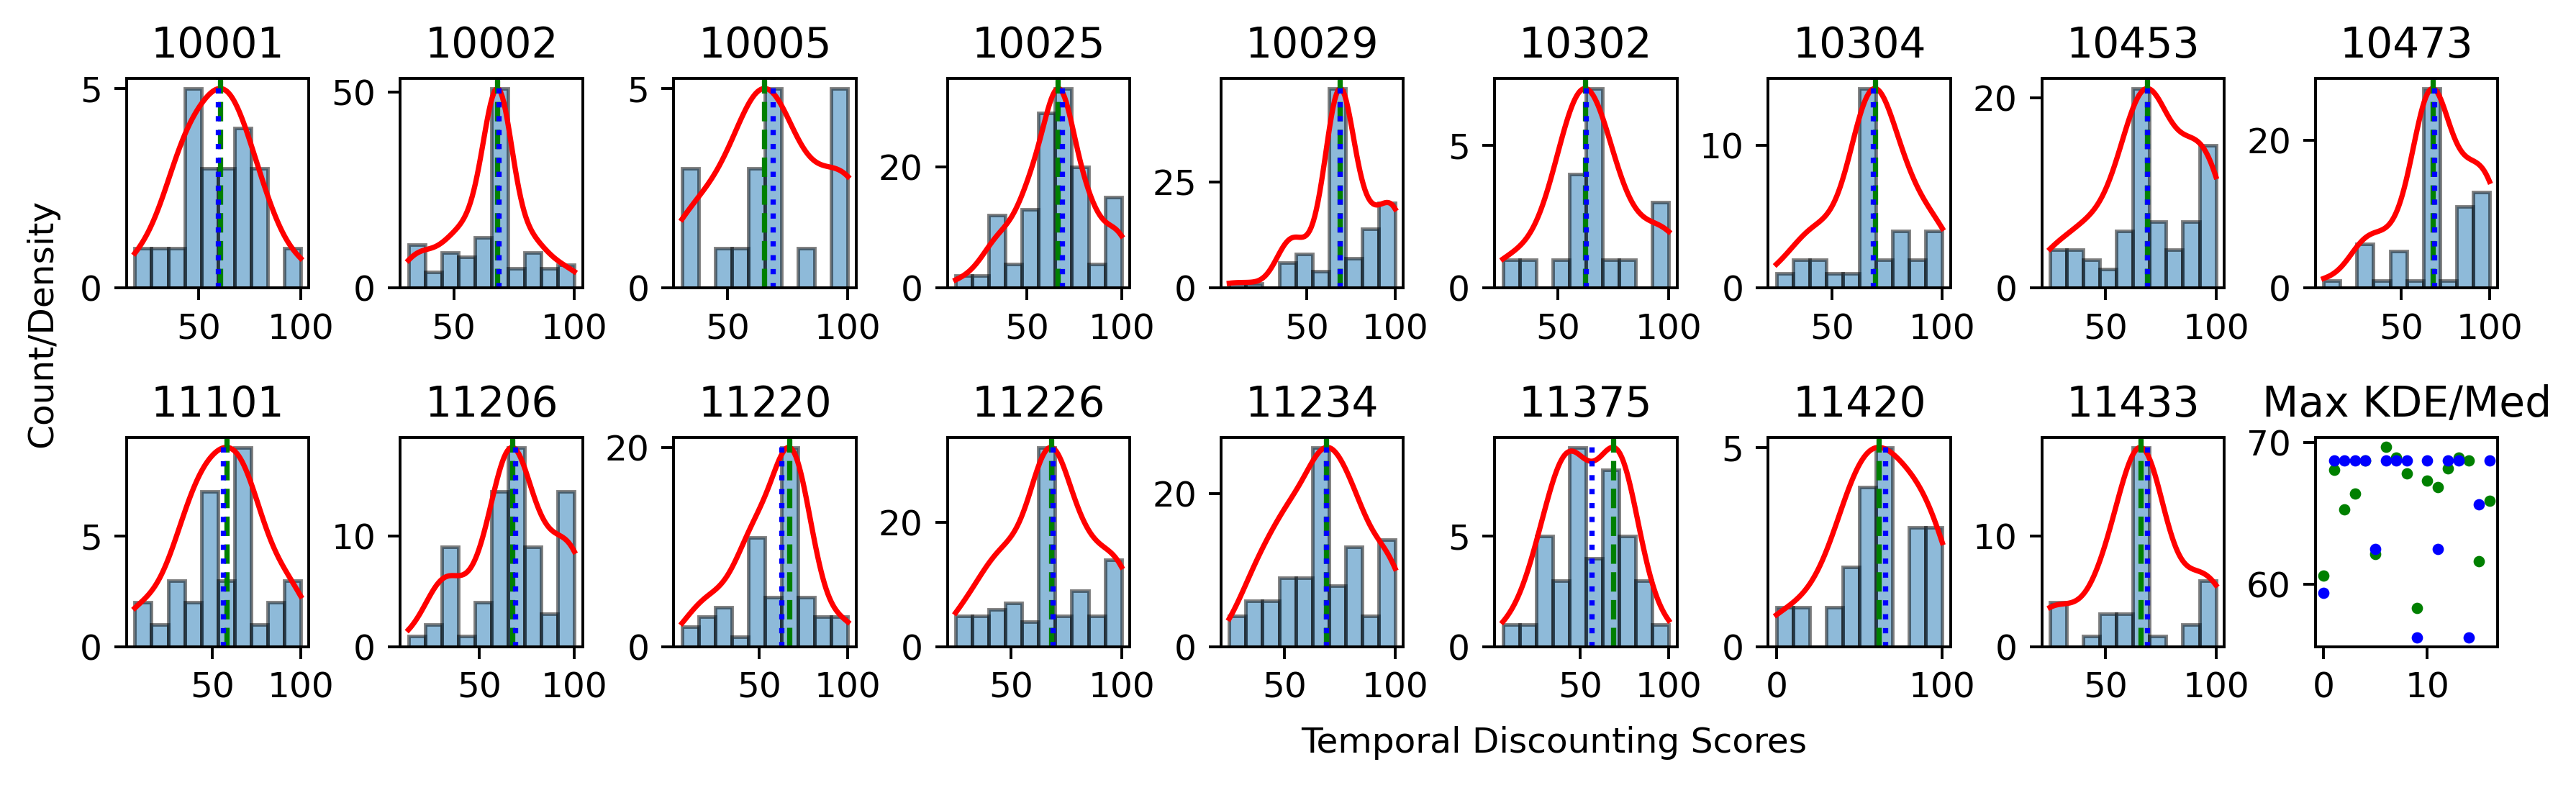

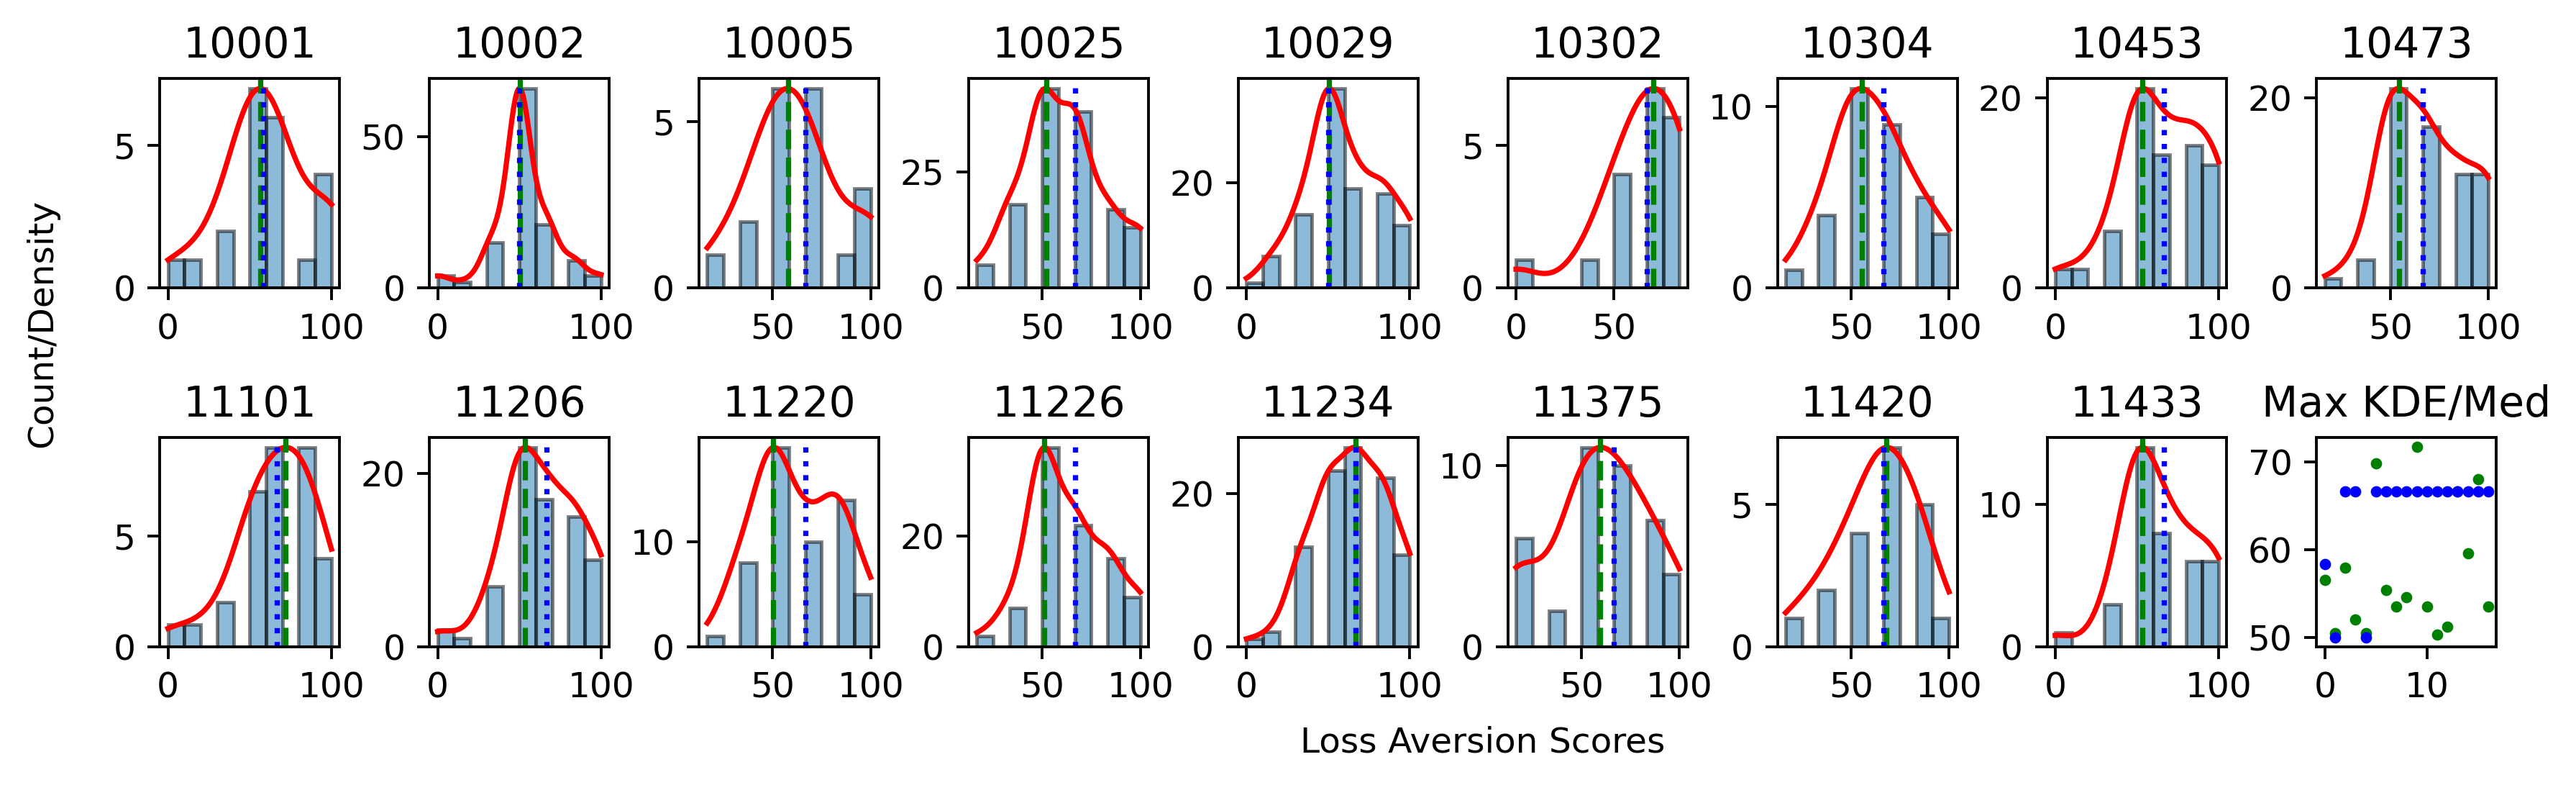

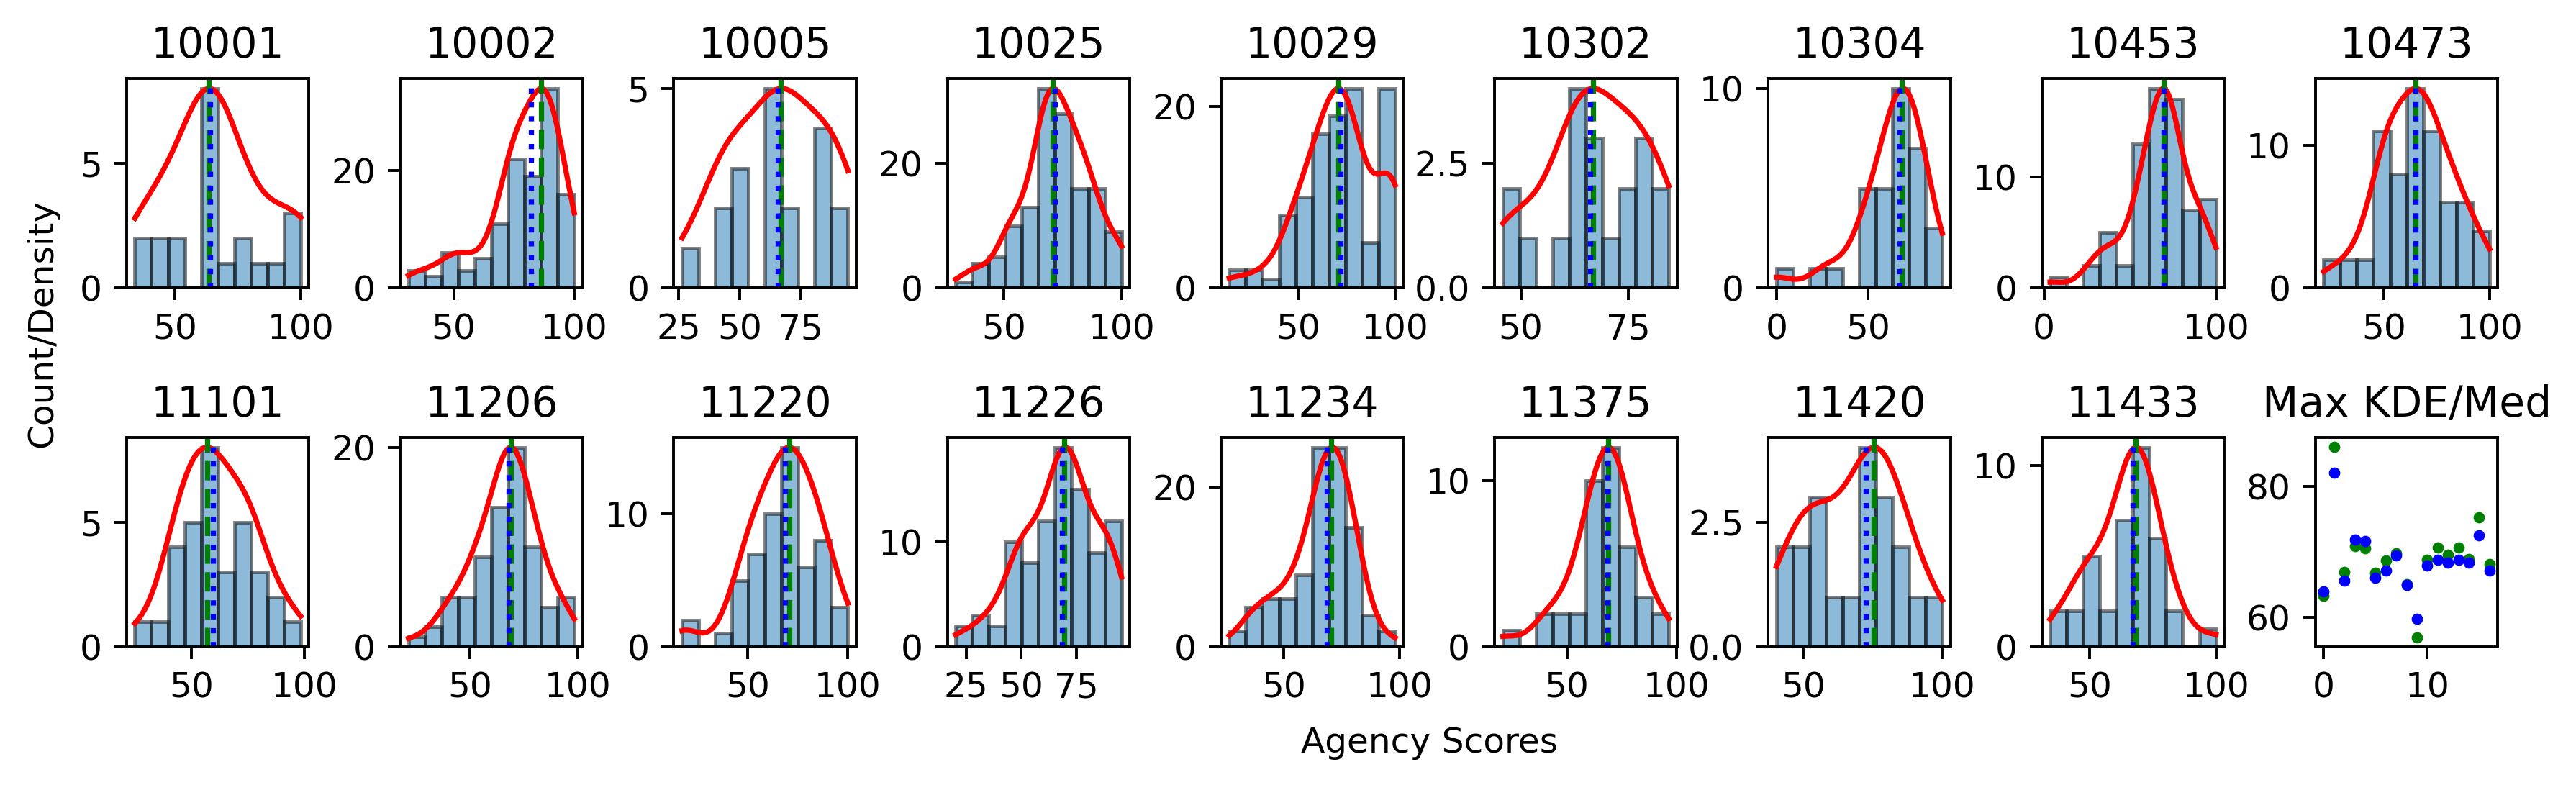

In [4]:
for score_name in ['regulated_tdscores','regulated_loss','regulated_agency']:
    df_i = df_scores[df_scores['modzcta_count']>15][[score_name,'MODZCTA']]
    grouped = df_i.groupby('MODZCTA')
    fig, axs = plt.subplots(2, 9, figsize=(10, 3),dpi=350)
    axs = axs.flatten()
    # Plot histograms for each group
    modes = {}
    medians = {}
    for i, (name, group) in enumerate(grouped):
        counts, bins, patches = axs[i].hist(group[score_name], bins=10, edgecolor='black', alpha=0.5)
        
        # KDE using gaussian_kde
        kde = gaussian_kde(group[score_name], bw_method='scott')
        x_vals = np.linspace(min(group[score_name]), max(group[score_name]), 100)
        kde_vals = kde(x_vals)
        
        # ax_kde = axs[i].twinx()
        # ax_kde.plot(x_vals, kde_vals, color='red')
        axs[i].plot(x_vals, kde_vals * max(counts) / max(kde_vals), color='red')  # Scale KDE to fit histogram
        
        mode_index = np.argmax(kde_vals)
        mode_value = x_vals[mode_index]
        modes[name] = mode_value
        # axs[i].hist(group['regulated_tdscores'], bins=10, edgecolor='black')
        median_value = np.median(group[score_name])
        medians[name] = median_value
        axs[i].set_title(f'{name}')
        
        axs[i].axvline(mode_value, color='green', linestyle='--')
        # ax_kde.text(mode_value, max(kde_vals), f'Mode: {mode_value:.2f}', color='green', ha='center')

        axs[i].axvline(median_value, color='blue', linestyle=':')
        # ax_kde.text(median_value, max(kde_vals) * 0.8, f'Median: {median_value:.2f}', color='blue', ha='center')
    # Hide any unused subplots
    axs[i+1].scatter(range(len(modes)),modes.values(), color='green', label='Mode',s=5)
    axs[i+1].scatter(range(len(medians)),medians.values(), color='blue', label='Median',s=5) 
    axs[i+1].set_title('Max KDE/Med')
    # for j in range(i+1, len(axs)):
    #     axs[j].set_visible(False)
    title_name = {'regulated_tdscores':'Temporal Discounting Scores','regulated_loss':'Loss Aversion Scores','regulated_agency':'Agency Scores'}[score_name]
    fig.text(0.0, 0.4, 'Count/Density', ha='center', rotation='vertical', fontsize=10)  # y-label
    fig.text(0.5, 0.0, title_name, va='center', fontsize=10)  # x-label


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5)

    plt.savefig('../results/plots_maps/hist_per_zcta_{}.png'.format(score_name),dpi=350, bbox_inches='tight')

In [34]:
def compute_mode(values):
    if len(values) == 1:  # If only one value, return it as the mode
        return values.iloc[0]
    kde = gaussian_kde(values)
    x_vals = np.linspace(min(values), max(values), 100)
    kde_vals = kde(x_vals)
    mode = x_vals[np.argmax(kde_vals)]
    return mode

# Group by MODZCTA and calculate the mode for each score
df_s = df_scores[df_scores['modzcta_count']>15][['regulated_tdscores','regulated_loss','regulated_agency','MODZCTA']]
df_mode = df_s.groupby('MODZCTA').apply(lambda x: pd.Series({
    'regulated_tdscores_mode': compute_mode(x['regulated_tdscores']),
    'regulated_loss_mode': compute_mode(x['regulated_loss']),
    'regulated_agency_mode': compute_mode(x['regulated_agency']),
})).reset_index()

/var/folders/_0/2l3z2qss74scb88wvbv1szxr0000gn/T/ipykernel_90390/928309374.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mode = df_s.groupby('MODZCTA').apply(lambda x: pd.Series({


In [24]:
df_mode.to_csv('../results/scores/modzcta_scores_mode.csv',index=False)

In [35]:
import pandas as pd
import numpy as np
import sys
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm, LogNorm 
import matplotlib.ticker as mticker

gdf = gpd.read_file('../Data/geography_data/MODZCTA_2010.shp')
gdf['MODZCTA'] = gdf['MODZCTA'].astype(np.int64)
gdf_merged = gdf.merge(df_mode, on='MODZCTA', how='left')

In [36]:
print(gdf_merged['regulated_agency_mode'].max(), gdf_merged['regulated_agency_mode'].min())
print(gdf_merged['regulated_loss_mode'].max(), gdf_merged['regulated_loss_mode'].min())
print(gdf_merged['regulated_tdscores_mode'].max(), gdf_merged['regulated_tdscores_mode'].min())

86.11111111111111 56.89709595959596
71.71717171717172 50.33670033670033
69.69696969696969 58.333333333333336


regulated_tdscores_mode
regulated_loss_mode
regulated_agency_mode


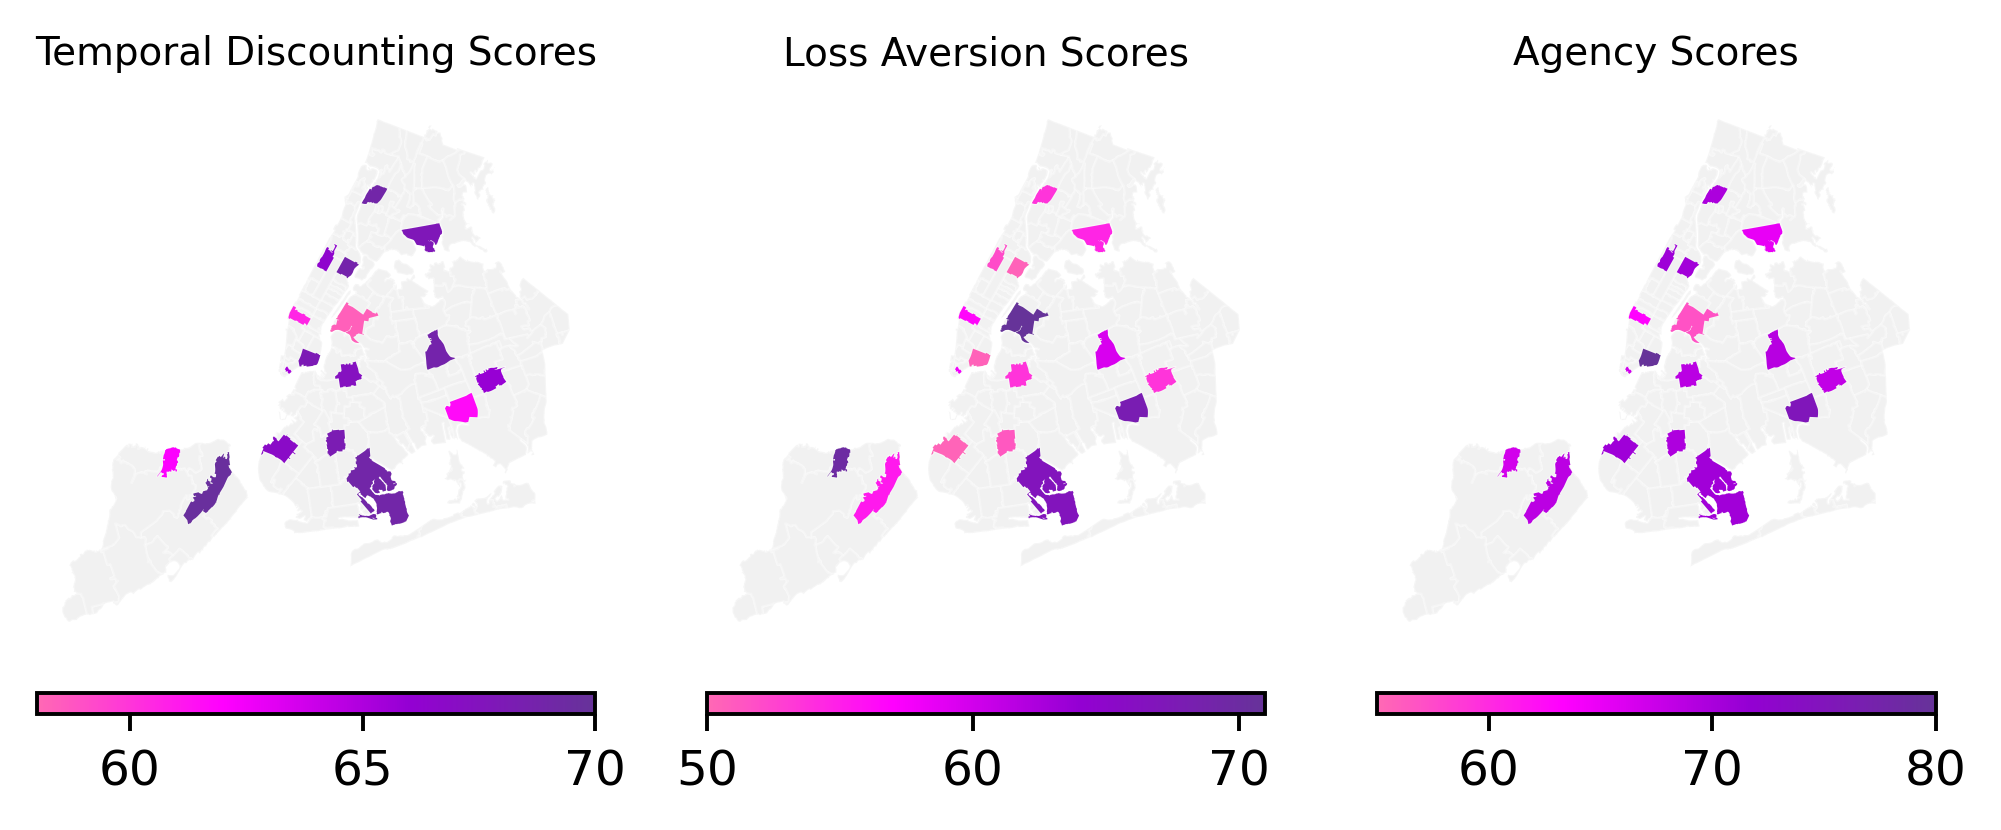

In [55]:
dpi = 350
figsize = (7, 3)  # inches
scores_title_dict1 = {'regulated_tdscores_mode':'d', 'regulated_loss_mode':'e', 'regulated_agency_mode':'f'}
scores_title_dict2 = {'regulated_tdscores_mode':'Temporal Discounting Scores', 'regulated_loss_mode':'Loss Aversion Scores', 'regulated_agency_mode':'Agency Scores'}

fig = plt.figure(figsize=figsize,dpi = dpi)  
# gs = gridspec.GridSpec(1, 3, height_ratios=[1], hspace=0.3, wspace=0.1)
gs = gridspec.GridSpec(2, 3, height_ratios=[35, 0.8], hspace=-0.3, wspace=0.2)  # Adjust height_ratios for plot to colorbar
vmax_min_dic = {'regulated_tdscores_mode':(58,
70), 'regulated_loss_mode':(50,71), 'regulated_agency_mode':(55,80)}

for idx, (k,v) in enumerate(scores_title_dict1.items()):
    print (k)
    ax = fig.add_subplot(gs[0, idx])
    gdf.plot(ax=ax, color='lightgrey', alpha=0.3, edgecolor='white',linewidth=0.5)
    
    vmin = vmax_min_dic[k][0]
    vmax = vmax_min_dic[k][1]
    norm = Normalize(vmin=vmin, vmax=vmax)
    # norm = Normalize()
    cmap = mpl.cm.winter # PRGn summer
    mapping = gdf_merged.plot(column=k, cmap=pink_to_purple,legend=False,  norm = norm, ax=ax)
    
    cax = fig.add_subplot(gs[1, idx])
    sm = ScalarMappable(norm=norm, cmap=pink_to_purple)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, orientation='horizontal',pad=0.01, fraction=0.4)
    
    ## Highlight the modzcta
    # highlight_gdf.plot(ax=ax, color='none', edgecolor='mediumpurple', linewidth=1)
    ##
    # ax.set_title(v,fontsize=10, fontweight='bold',loc='left')
    # ax.text(0.5, 1.02, scores_title_dict2[k], fontsize=8, transform=ax.transAxes,ha='center', va='bottom')
    ax.set_title(scores_title_dict2[k], fontsize=8)
    ax.axis('off')

filename = f'../results/plots_maps/scores_png/scores.png'
plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi,transparent=True)
# plt.close()